In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv(r"C:\\Users\\cvveljanovski\\Desktop\\Learning\\DataScience\\Datasets\\competition_predict_future_sales\\sales_train.csv")

In [3]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
#Check for null values in the data
data.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [5]:
#Drop not needed columns for prediction since they are missing in the testing dataset
data = data.drop(["date"], axis = 1)
data = data.drop(["item_price"], axis = 1)

In [6]:
data.head()

,date_block_num,shop_id,item_id,item_cnt_day
0,0,59,22154,1.0
1,0,25,2552,1.0
2,0,25,2552,-1.0
3,0,25,2554,1.0
4,0,25,2555,1.0


In [7]:
# Lets change the item count per day column into a sum per month per item per shop
sum_month_item = data.groupby(["date_block_num","shop_id","item_id"]).agg({'item_cnt_day': ['sum']}).reset_index()

In [8]:
sum_month_item.head()

,date_block_num,shop_id,item_id,item_cnt_day
,,,,sum
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


In [9]:
df = sum_month_item.copy()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609124 entries, 0 to 1609123
Data columns (total 4 columns):
(date_block_num, )     1609124 non-null int64
(shop_id, )            1609124 non-null int64
(item_id, )            1609124 non-null int64
(item_cnt_day, sum)    1609124 non-null float64
dtypes: float64(1), int64(3)
memory usage: 49.1 MB


### EDA per feature

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


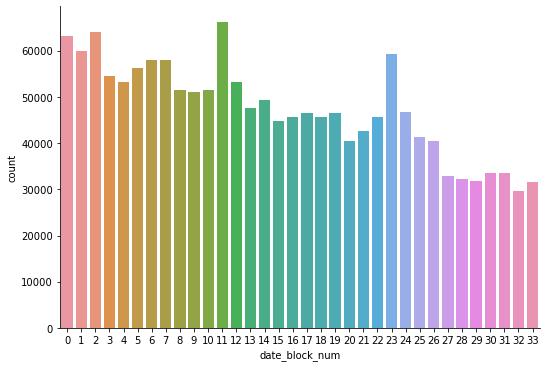

In [11]:
#Lets see the distribution of the bought items per month
sns.factorplot(x='date_block_num', data=df, kind='count', size = 5, aspect=1.5)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


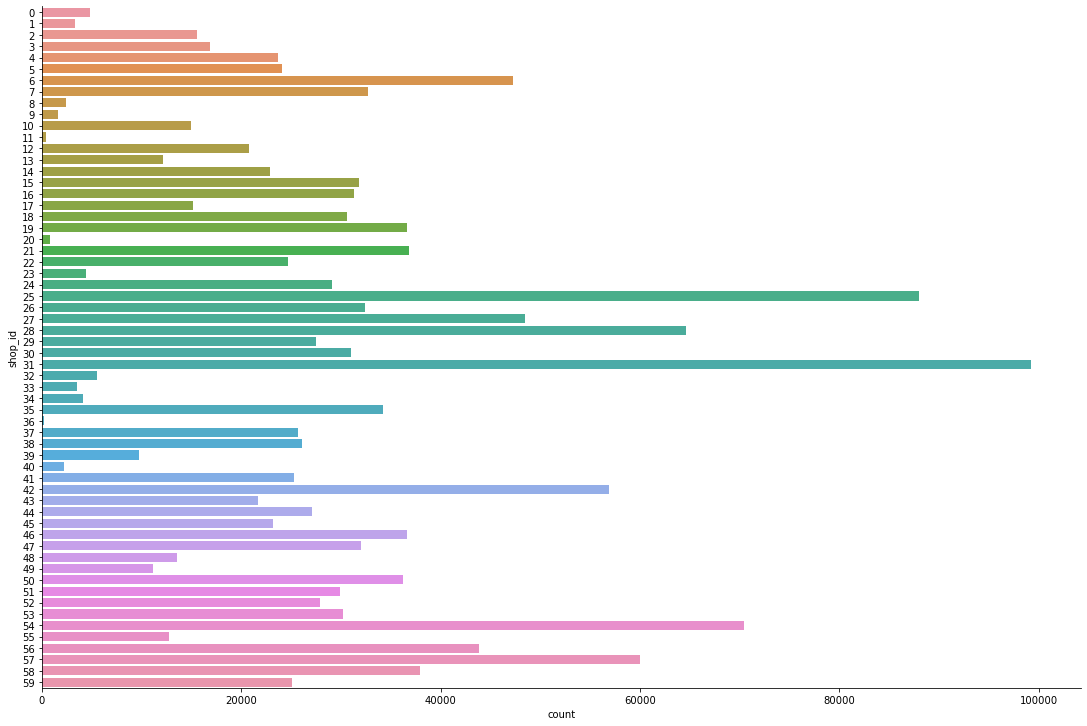

In [12]:
#Lets see the distribution of the bought items per shop
sns.factorplot(y='shop_id', data=df, kind='count', size = 10, aspect=1.5)

### Split the training dataset into training and testing dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["item_cnt_day"],axis=1),df['item_cnt_day'],test_size=0.3, random_state=0)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


### Lets define and fit the model

#### 1. KNN

In [14]:
#model=[KNeighborsRegressor(), LinearRegression(), SVR(), RandomForestRegressor() ,AdaBoostRegressor(),BaggingRegressor(),RidgeCV()]
clf = AdaBoostRegressor()

#Define the model and the GridSearchCV tool
model = AdaBoostRegressor()
estimator = model
search = GridSearchCV(
    estimator = model,
    param_grid = {
  'n_estimators':(10, 30, 50),
  'learning_rate':(0.01, 0.03)
 },
    n_jobs=-1,
    scoring="r2",
    cv=10,
    verbose=3
)
Grid_search = search.fit(X_train, y_train)
Accuracy = search.best_score_
Grid_search.best_params_


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 31.3min finished
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'learning_rate': 0.01, 'n_estimators': 10}

In [15]:
clf = AdaBoostRegressor(n_estimators = 10, learning_rate = 0.01)
rmse = []
clf.fit(X_train,y_train)
test_pred=clf.predict(X_test)
rmse.append(np.sqrt(mean_squared_error(test_pred,y_test)))
d={'RMSE':rmse}   
d

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'RMSE': [7.3623136331981325]}

In [16]:
#Import the official test dataset
test_data = pd.read_csv(r"C:\\Users\\cvveljanovski\\Desktop\\Learning\\DataScience\\Datasets\\competition_predict_future_sales\\test.csv")

In [17]:
pred = clf.predict(test_data)

In [18]:
pred = pd.DataFrame(pred)

In [19]:
pred.to_csv('C:\\Users\\cvveljanovski\\Desktop\\Learning\\DataScience\\Datasets\\competition_predict_future_sales\\pred.csv')